## Mateusz Sikora - projekt - Technologie obiektowe

In [1]:
import codecs #dzięki tej bibliotece zmienimy system kodowania Unicode
import shutil #kopiuje zawartość pliku

In [2]:
with codecs.open("script.sql", encoding="utf-16") as input_file:
    with codecs.open("script2.txt", "w", encoding="utf-8") as output_file:
        shutil.copyfileobj(input_file, output_file)

file=open("script2.txt", mode = 'r')
read_data = file.read()
print(read_data)

USE [master]
GO
/****** Object:  Database [Pracownicy]    Script Date: 23.03.2022 10:47:53 ******/
CREATE DATABASE [Pracownicy]
 CONTAINMENT = NONE
 ON  PRIMARY 
( NAME = N'Pracownicy', FILENAME = N'C:\Program Files\Microsoft SQL Server\MSSQL15.SQLEXPRESS\MSSQL\DATA\Pracownicy.mdf' , SIZE = 8192KB , MAXSIZE = UNLIMITED, FILEGROWTH = 65536KB )
 LOG ON 
( NAME = N'Pracownicy_log', FILENAME = N'C:\Program Files\Microsoft SQL Server\MSSQL15.SQLEXPRESS\MSSQL\DATA\Pracownicy_log.ldf' , SIZE = 8192KB , MAXSIZE = 2048GB , FILEGROWTH = 65536KB )
 WITH CATALOG_COLLATION = DATABASE_DEFAULT
GO
ALTER DATABASE [Pracownicy] SET COMPATIBILITY_LEVEL = 150
GO
IF (1 = FULLTEXTSERVICEPROPERTY('IsFullTextInstalled'))
begin
EXEC [Pracownicy].[dbo].[sp_fulltext_database] @action = 'enable'
end
GO
ALTER DATABASE [Pracownicy] SET ANSI_NULL_DEFAULT OFF 
GO
ALTER DATABASE [Pracownicy] SET ANSI_NULLS OFF 
GO
ALTER DATABASE [Pracownicy] SET ANSI_PADDING OFF 
GO
ALTER DATABASE [Pracownicy] SET ANSI_WARNINGS OFF 
GO

In [3]:
tabela = read_data.split('CREATE TABLE') #liczy ilość tabel
Ilość_tabel=len(tabela)-1

print('Ilość tabel:', Ilość_tabel)

Ilość tabel: 3


In [4]:
file_name='script2.txt' #wyświetla linijki zawierające fraze 'create table'
szukana_fraza='CREATE TABLE'
lista_tabel = []
with open(file_name, 'r') as read_obj:
    for line in read_obj:
        if szukana_fraza in line: #jeśli szukana fraza jest danej linijce to zostaje dodana do listy
            lista_tabel.append(line.rstrip()) #rstrip usuwa zbędne spacje
print(lista_tabel)

['CREATE TABLE [dbo].[etat](', 'CREATE TABLE [dbo].[pracownik](', 'CREATE TABLE [dbo].[zespol](']


In [5]:
for i in range(Ilość_tabel):
    lista_tabel[i]=lista_tabel[i].replace("CREATE TABLE [","[")
    lista_tabel[i]=lista_tabel[i].replace("](","]")
    lista_tabel[i]=lista_tabel[i].replace("]","")
    lista_tabel[i]=lista_tabel[i].replace("[","")

print(lista_tabel)

['dbo.etat', 'dbo.pracownik', 'dbo.zespol']


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

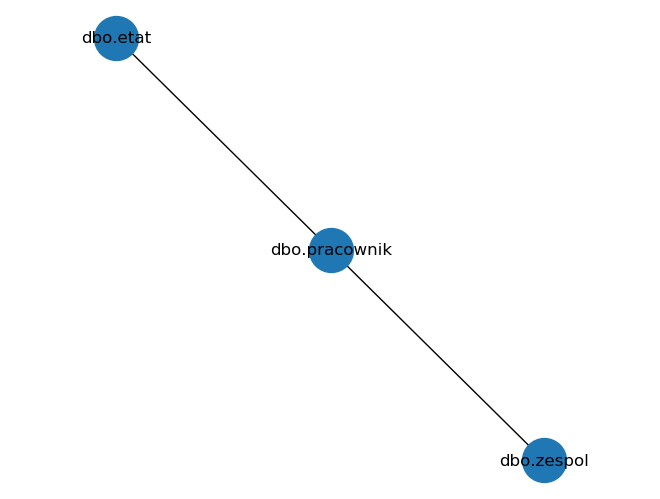

In [7]:
G=nx.Graph()
for i in range(Ilość_tabel):
    G.add_node(lista_tabel[i])
G.add_edge(lista_tabel[1],lista_tabel[2])
G.add_edge(lista_tabel[1],lista_tabel[0])
nx.draw(G, node_size=1000, with_labels = True)
plt.show()